In [1]:
# Import our dependencies
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Imports for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import set_config

In [2]:
# import our input datasets
test_df = pd.read_csv('data/2122season.csv')
train_df = pd.read_csv('data/past_seasons.csv')

In [3]:
train_df

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W/L%
0,72,0.069,0.079,0.035,0.019,0.112,-0.006,0.039,0.065,0.062,...,0.150,0.129,0.134,0.082,-0.038,0.003,-0.122,-0.101,0.093,0.569
1,67,-0.180,-0.197,-0.194,-0.002,-0.246,-0.204,-0.018,-0.175,-0.187,...,-0.308,-0.208,-0.233,-0.242,-0.225,-0.186,-0.223,-0.199,-0.194,0.299
2,82,0.008,0.084,0.073,0.005,0.164,0.193,-0.009,0.051,0.004,...,0.285,0.049,0.100,0.088,0.058,0.204,0.095,0.203,0.097,0.354
3,82,-0.009,0.002,0.014,-0.005,0.258,0.190,0.019,-0.076,-0.065,...,-0.118,-0.036,-0.055,0.004,-0.051,-0.123,-0.014,0.077,0.002,0.293
4,82,0.003,-0.014,-0.001,-0.006,-0.106,-0.081,-0.009,0.017,0.040,...,0.240,0.008,0.053,-0.077,-0.100,-0.183,0.055,-0.050,0.003,0.524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,82,-0.003,0.057,0.069,-0.005,0.535,0.411,0.022,0.046,0.054,...,-0.015,0.003,-0.002,-0.047,0.275,NaN,NaN,NaN,NaN,NaN
1136,82,0.005,0.011,-0.022,0.016,0.014,0.190,-0.044,0.011,-0.029,...,-0.066,-0.018,-0.033,0.071,-0.241,NaN,NaN,NaN,NaN,NaN
1137,82,-0.001,-0.028,-0.015,-0.006,0.186,0.004,0.045,-0.031,-0.016,...,0.050,-0.059,-0.028,0.032,0.140,NaN,NaN,NaN,NaN,NaN
1138,82,0.003,-0.042,-0.046,0.002,-0.092,-0.021,-0.020,-0.041,-0.047,...,-0.094,0.020,-0.016,-0.078,0.003,NaN,NaN,NaN,NaN,NaN


In [4]:
test_df

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W/L%
0,60,-0.173,-0.159,-0.160,0.001,-0.156,-0.165,0.004,-0.160,-0.158,...,-0.217,-0.181,-0.189,-0.159,-0.181,-0.222,-0.225,-0.203,-0.176,0.483
1,63,-0.119,-0.160,-0.139,-0.012,-0.190,-0.119,-0.030,-0.146,-0.153,...,-0.122,-0.071,-0.083,-0.112,-0.185,-0.008,-0.131,-0.203,-0.152,0.571
2,63,-0.117,-0.074,-0.080,0.003,-0.124,-0.094,-0.012,-0.049,-0.071,...,-0.084,-0.100,-0.096,-0.115,-0.035,-0.110,-0.210,-0.025,-0.088,0.476
3,62,-0.142,-0.142,-0.154,0.006,-0.241,-0.249,0.004,-0.100,-0.094,...,-0.216,-0.160,-0.172,-0.222,-0.085,-0.082,-0.262,-0.149,-0.126,0.629
4,61,-0.160,-0.135,-0.165,0.016,-0.007,-0.054,0.017,-0.180,-0.223,...,-0.161,-0.097,-0.112,-0.105,-0.220,-0.188,-0.184,-0.212,-0.130,0.590
5,61,-0.150,-0.193,-0.167,-0.015,-0.217,-0.179,-0.017,-0.181,-0.159,...,-0.128,-0.157,-0.151,-0.128,-0.049,-0.193,-0.114,-0.133,-0.196,0.590
6,61,-0.160,-0.196,-0.178,-0.010,-0.143,-0.093,-0.021,-0.218,-0.232,...,-0.277,-0.124,-0.160,-0.142,-0.244,-0.310,-0.095,-0.138,-0.186,0.590
7,61,-0.156,-0.178,-0.120,-0.030,-0.190,-0.111,-0.031,-0.173,-0.126,...,-0.024,-0.181,-0.145,-0.205,-0.113,-0.210,-0.176,-0.104,-0.181,0.246
8,61,-0.151,-0.172,-0.169,-0.002,-0.158,-0.123,-0.015,-0.180,-0.205,...,0.037,-0.130,-0.099,-0.162,-0.024,-0.143,-0.148,-0.183,-0.174,0.705
9,60,-0.166,-0.178,-0.190,0.006,-0.194,-0.204,0.004,-0.170,-0.178,...,-0.130,-0.186,-0.174,-0.186,-0.200,-0.247,-0.052,-0.133,-0.170,0.250


In [5]:
train_df = train_df.dropna()

In [6]:
#split up target column
X_train = train_df.drop('W/L%',axis=1)
y_train = train_df['W/L%']
X_test = test_df.drop('W/L%',axis=1)
y_test = test_df['W/L%']

In [7]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Fit and check model accuracy score
rfr = RandomForestRegressor(random_state=42, n_estimators=1000).fit(X_train_scaled, y_train)
print(f'R-squared training Score: {rfr.score(X_train_scaled, y_train)}')
print(f'R-squared testing Score: {rfr.score(X_test_scaled, y_test)}')

R-squared training Score: 0.8629271592006356
R-squared testing Score: 0.02028075087722281


In [9]:
# Test accuracy of prediction model
y_prediction = rfr.predict(X_test)

mse = mean_squared_error(y_test, y_prediction)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  0.02214268983353329
RMSE:  0.011071344916766646


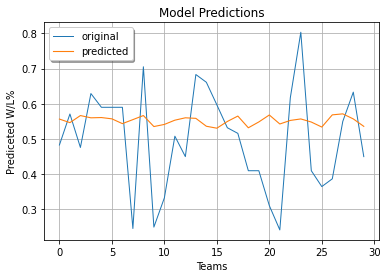

<Figure size 432x288 with 0 Axes>

In [16]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_prediction, linewidth=1.1, label="predicted")
plt.title("Model Predictions")
plt.xlabel('Teams')
plt.ylabel('Prediceted W/L%')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.savefig('combined_graph')

In [11]:
#Create a dataframe to hold predictions
teams = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','BKN/NJN','NOP','NYK','OKC','ORL','PHI','PHX','POR','SAC','SAS','TOR','UTA','WAS']
predicted_df = pd.DataFrame(
    {'Team': teams})
predicted_df['W/L%'] = ""
predicted_df.head()

,Team,W/L%
0,ATL,
1,BOS,
2,CHA,
3,CHI,
4,CLE,


In [12]:
#put W/L values into list
winloss = []
for i in range(0, len(predicted_df['Team'])):
    Score = y_prediction[i].round(decimals=3)
    winloss.append(Score)

In [13]:
predicted_df['W/L%'] = winloss
predicted_df

,Team,W/L%
0,ATL,0.557
1,BOS,0.546
2,CHA,0.567
3,CHI,0.560
4,CLE,0.561
5,DAL,0.557
6,DEN,0.544
7,DET,0.555
8,GSW,0.567
9,HOU,0.535


In [14]:
predicted_df = predicted_df.set_index("Team")
predicted_df

,W/L%
Team,
ATL,0.557
BOS,0.546
CHA,0.567
CHI,0.560
CLE,0.561
DAL,0.557
DEN,0.544
DET,0.555
GSW,0.567


In [15]:
cptable = predicted_df.to_html()
combinedtable = cptable.replace('\n','')
combinedtable

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>W/L%</th>    </tr>    <tr>      <th>Team</th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>ATL</th>      <td>0.557</td>    </tr>    <tr>      <th>BOS</th>      <td>0.546</td>    </tr>    <tr>      <th>CHA</th>      <td>0.567</td>    </tr>    <tr>      <th>CHI</th>      <td>0.560</td>    </tr>    <tr>      <th>CLE</th>      <td>0.561</td>    </tr>    <tr>      <th>DAL</th>      <td>0.557</td>    </tr>    <tr>      <th>DEN</th>      <td>0.544</td>    </tr>    <tr>      <th>DET</th>      <td>0.555</td>    </tr>    <tr>      <th>GSW</th>      <td>0.567</td>    </tr>    <tr>      <th>HOU</th>      <td>0.535</td>    </tr>    <tr>      <th>IND</th>      <td>0.541</td>    </tr>    <tr>      <th>LAC</th>      <td>0.553</td>    </tr>    <tr>      <th>LAL</th>      <td>0.560</td>    </tr>    <tr>      <th>MEM</th>      <td>0.559</td>    </tr>    <tr>      <th>MIA</th>      <td>